***Тема курсового проекта: "Спрогнозировать количество к заказу с помощью модели линейной регрессии y_hat = b0 + b1*x1 + b2*x2 + ... bn*xn матричным способом"***

**Описание датасета**

* **НомерЗаказа**     - номер документа Автозаказ в программе 1с
* **ГодЗаказа**       - год из поля дата документа Автозаказ
* **МесяцЗаказа**     - месяц из поля дата документа Автозаказ
* **ДеньЗаказа**      - день из поля дата документа Автозаказ
* **НеделяЗаказа**    - номер недели из поля дата документа Автозаказ
* **КодТовара**       - код товара, количество которого необходимо заказать (из табличной части документа Автозаказ)
* **ЦЕНА_ЗКП_РУБ**    - цена закупочная в рублях
* **СРОК_ГДН_ОСТ_Д**  - срок годности остаточный, в днях
* **ОСТ_ТЕК_ШТ**      - текущий остаток в шт/кг
* **ТОВ_В_ПУТ_СУМ_ШТ**- товара в пути в шт/кг
* **ПРДЖ_СР_ШТ_ДО**   - продажи средние шт/кг
* **КВО_ПРДЖ_БАЗА_ШТ**- продажи базовые в шт
* **ПРДЖ_БАЗА_СР_ШТ** - продажи, базовые, средние, шт/кг
* **ППП_ДЛН_Д**       - период покрытия продаж длительность дней
* **ТРБ_МАГ_КВНТ_ШТ** - требование магазина, квант, шт/кг
* **ПРДЖ_ШТ_НЕД**     - недельные продажи 
* **СПИС_ШТ_НЕД**     - недельные списания 

* **ЗКЗ_ИТГ_ШТ**    - количество к заказу, наша целевая переменная, которую мы будем пытаться предсказать

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
%matplotlib inline

In [95]:
df = pd.read_csv('Order1c_pred.csv')
df.head()

,НомерЗаказа,ГодЗаказа,МесяцЗаказа,ДеньЗаказа,НеделяЗаказа,КодТовара,ЦЕНА_ЗКП_РУБ,СРОК_ГДН_ОСТ_Д,ОСТ_ТЕК_ШТ,ТОВ_В_ПУТ_СУМ_ШТ,ПРДЖ_СР_ШТ_ДО,КВО_ПРДЖ_БАЗА_ШТ,ПРДЖ_БАЗА_СР_ШТ,ППП_ДЛН_Д,ТРБ_МАГ_КВНТ_ШТ,ПРДЖ_ШТ_НЕД,СПИС_ШТ_НЕД,ЗКЗ_ИТГ_ШТ
0,M3300009893,2018,4,24,17,389 965,67.85,245,21.0,0.0,0.68421,3,5.50612,14,6.0,2.0,0.0,6.0
1,M3300009893,2018,4,24,17,389 970,36.03,245,14.0,0.0,0.45714,5,3.28168,14,12.0,3.0,0.0,12.0
2,M3300009893,2018,4,24,17,366 976,30.54,482,12.0,0.0,0.31428,5,2.20001,14,6.0,0.0,0.0,6.0
3,M3300009893,2018,4,24,17,367 448,46.40,241,11.0,0.0,0.10345,4,0.79365,14,10.0,0.0,1.0,10.0
4,M3300009893,2018,4,24,17,260 461,50.92,245,12.0,0.0,0.39999,5,2.62693,14,12.0,4.0,0.0,12.0


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 659803 entries, 0 to 659802
Data columns (total 18 columns):
НомерЗаказа         659803 non-null object
ГодЗаказа           659803 non-null int64
МесяцЗаказа         659803 non-null int64
ДеньЗаказа          659803 non-null int64
НеделяЗаказа        659803 non-null int64
КодТовара           659803 non-null object
ЦЕНА_ЗКП_РУБ        659803 non-null float64
СРОК_ГДН_ОСТ_Д      659803 non-null int64
ОСТ_ТЕК_ШТ          659803 non-null float64
ТОВ_В_ПУТ_СУМ_ШТ    659803 non-null float64
ПРДЖ_СР_ШТ_ДО       659803 non-null float64
КВО_ПРДЖ_БАЗА_ШТ    659803 non-null int64
ПРДЖ_БАЗА_СР_ШТ     659803 non-null float64
ППП_ДЛН_Д           659803 non-null int64
ТРБ_МАГ_КВНТ_ШТ     659803 non-null float64
ПРДЖ_ШТ_НЕД         659803 non-null float64
СПИС_ШТ_НЕД         659803 non-null float64
ЗКЗ_ИТГ_ШТ          659803 non-null float64
dtypes: float64(9), int64(7), object(2)
memory usage: 90.6+ MB


In [97]:
df['КодТовара'].value_counts()

84 566     1021
84 560     1012
33 793     1011
85 009     1010
214 116     996
84 555      990
33 791      986
264 169     983
257 047     979
84 543      976
181 135     969
84 545      949
84 582      948
165 893     940
84 724      936
84 715      903
84 578      901
84 580      894
165 894     882
33 790      868
84 557      862
7 822       859
148 863     843
84 554      838
110 356     838
84 602      835
236 668     825
124 634     822
124 637     822
236 667     805
           ... 
331 049       1
3 877         1
338 193       1
273 140       1
407 375       1
329 109       1
260 744       1
312 443       1
395 865       1
280 252       1
326 985       1
93 039        1
410 903       1
323 872       1
409 457       1
326 104       1
326 103       1
185 653       1
225 928       1
384 201       1
50 289        1
311 871       1
314 388       1
271 584       1
310 788       1
80 207        1
269 581       1
182 398       1
229 012       1
309 428       1
Name: КодТовара, Length:

In [98]:
df['КодТовара'] = df['КодТовара'].str.replace('\s', '')
df_filter = df['КодТовара'].isin(["33793"])
df = df[df_filter]
col_date = pd.to_datetime([f'{y}-{m}-{d}' for y, m, d in zip(df['ГодЗаказа'], df['МесяцЗаказа'], df['ДеньЗаказа'])])
df.index = col_date
df.drop("ГодЗаказа", axis=1, inplace=True)
df.drop("МесяцЗаказа", axis=1, inplace=True)
df.drop("ДеньЗаказа", axis=1, inplace=True)
df = df.rename_axis('ДатаЗаказа').sort_values(by = 'ДатаЗаказа', ascending = True)
df.head()

,НомерЗаказа,НеделяЗаказа,КодТовара,ЦЕНА_ЗКП_РУБ,СРОК_ГДН_ОСТ_Д,ОСТ_ТЕК_ШТ,ТОВ_В_ПУТ_СУМ_ШТ,ПРДЖ_СР_ШТ_ДО,КВО_ПРДЖ_БАЗА_ШТ,ПРДЖ_БАЗА_СР_ШТ,ППП_ДЛН_Д,ТРБ_МАГ_КВНТ_ШТ,ПРДЖ_ШТ_НЕД,СПИС_ШТ_НЕД,ЗКЗ_ИТГ_ШТ
ДатаЗаказа,,,,,,,,,,,,,,,
2015-12-17,М3300013749,51,33793,22.5,2,0.0,10.0,14.00000,0,98.0,1,1.0,0.0,0.0,26.0
2015-12-18,М3300013819,51,33793,22.5,2,7.0,14.0,14.00000,0,98.0,1,1.0,0.0,0.0,19.0
2015-12-19,М3300013878,51,33793,22.5,2,10.0,6.0,12.50000,0,98.0,1,1.0,0.0,0.0,23.0
2015-12-20,М3300013889,51,33793,22.5,2,3.0,10.0,12.66667,0,98.0,1,1.0,0.0,0.0,25.0
2015-12-21,М3300013916,52,33793,22.5,2,2.0,10.0,12.25000,0,98.0,1,1.0,0.0,0.0,26.0


In [99]:
zak = df['КВО_ПРДЖ_БАЗА_ШТ']
zak.head()

ДатаЗаказа
2015-12-17    0
2015-12-18    0
2015-12-19    0
2015-12-20    0
2015-12-21    0
Name: КВО_ПРДЖ_БАЗА_ШТ, dtype: int64

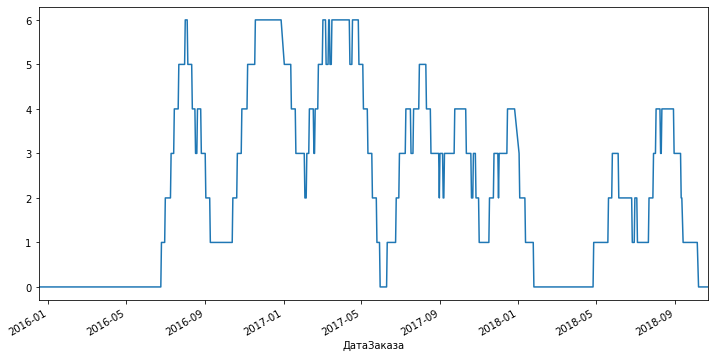

In [100]:
zak.plot(figsize=(12,6))

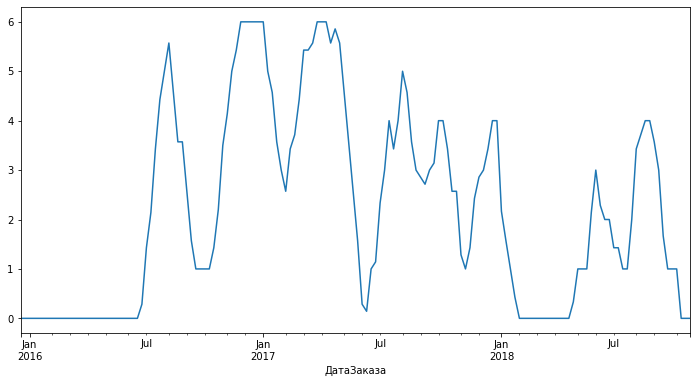

In [101]:
zak = zak.resample('W').mean()
zak.plot(figsize=(12,6))

count    150.000000
mean       2.228000
std        2.001523
min        0.000000
25%        0.000000
50%        2.000000
75%        3.678571
max        6.000000
Name: КВО_ПРДЖ_БАЗА_ШТ, dtype: float64

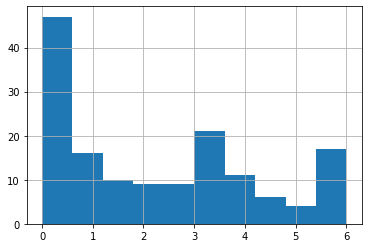

In [102]:
itog = zak.describe()
zak.hist()
itog

In [103]:
df = df.select_dtypes(include = ['float64', 'int64'])
df.head()

,НеделяЗаказа,ЦЕНА_ЗКП_РУБ,СРОК_ГДН_ОСТ_Д,ОСТ_ТЕК_ШТ,ТОВ_В_ПУТ_СУМ_ШТ,ПРДЖ_СР_ШТ_ДО,КВО_ПРДЖ_БАЗА_ШТ,ПРДЖ_БАЗА_СР_ШТ,ППП_ДЛН_Д,ТРБ_МАГ_КВНТ_ШТ,ПРДЖ_ШТ_НЕД,СПИС_ШТ_НЕД,ЗКЗ_ИТГ_ШТ
ДатаЗаказа,,,,,,,,,,,,,
2015-12-17,51,22.5,2,0.0,10.0,14.00000,0,98.0,1,1.0,0.0,0.0,26.0
2015-12-18,51,22.5,2,7.0,14.0,14.00000,0,98.0,1,1.0,0.0,0.0,19.0
2015-12-19,51,22.5,2,10.0,6.0,12.50000,0,98.0,1,1.0,0.0,0.0,23.0
2015-12-20,51,22.5,2,3.0,10.0,12.66667,0,98.0,1,1.0,0.0,0.0,25.0
2015-12-21,52,22.5,2,2.0,10.0,12.25000,0,98.0,1,1.0,0.0,0.0,26.0


Посмотрите, какие предикторы коррелируют с игреком, а какие нет. Оставить, которые коррелируют. Также уберите те предикторы, которые коррелируют c теми, что в модель включены. 

In [104]:
y = df['ЗКЗ_ИТГ_ШТ'].values
y

array([26., 19., 23., ...,  2.,  1.,  2.])

In [105]:
np.corrcoef(df['ЦЕНА_ЗКП_РУБ'].values, y)

array([[ 1.       , -0.3836583],
       [-0.3836583,  1.       ]])

In [106]:
np.corrcoef(df['СРОК_ГДН_ОСТ_Д'].values, y)

array([[1.       , 0.2171023],
       [0.2171023, 1.       ]])

In [107]:
np.corrcoef(df['ОСТ_ТЕК_ШТ'].values, y)

array([[ 1.        , -0.15597473],
       [-0.15597473,  1.        ]])

In [108]:
np.corrcoef(df['ПРДЖ_СР_ШТ_ДО'].values, y)

array([[1.        , 0.56814163],
       [0.56814163, 1.        ]])

In [109]:
np.corrcoef(df['КВО_ПРДЖ_БАЗА_ШТ'].values, y)

array([[1.       , 0.3108419],
       [0.3108419, 1.       ]])

In [117]:
np.corrcoef(df['ПРДЖ_БАЗА_СР_ШТ'].values, y)

array([[1.        , 0.68333793],
       [0.68333793, 1.        ]])

In [118]:
np.corrcoef(df['ППП_ДЛН_Д'].values, y)

array([[1.        , 0.04545636],
       [0.04545636, 1.        ]])

In [119]:
df['ТРБ_МАГ_КВНТ_ШТ'].value_counts()

1.0    1011
Name: ТРБ_МАГ_КВНТ_ШТ, dtype: int64

In [120]:
np.corrcoef(df['ТРБ_МАГ_КВНТ_ШТ'].values, y)

array([[nan, nan],
       [nan,  1.]])

In [121]:
np.corrcoef(df['ПРДЖ_ШТ_НЕД'].values, y)

array([[1.        , 0.27519703],
       [0.27519703, 1.        ]])

In [122]:
np.corrcoef(df['СПИС_ШТ_НЕД'].values, y)

array([[1.        , 0.17393109],
       [0.17393109, 1.        ]])

In [123]:
np.corrcoef(df['ТОВ_В_ПУТ_СУМ_ШТ'].values, y)

array([[1.        , 0.22285296],
       [0.22285296, 1.        ]])

In [137]:
np.corrcoef(df['НеделяЗаказа'].values, y)

array([[1.        , 0.04664715],
       [0.04664715, 1.        ]])

С y коррелируют более 0,5 следующие предикторы: ОСТ_ТЕК_ШТ, ПРДЖ_СР_ШТ_ДО, ПРДЖ_БАЗА_СР_ШТ, ТРБ_МАГ_КВНТ_ШТ.
    Посмотрим, как эти предикторы коррелируют между собой

In [124]:
np.corrcoef(df['ОСТ_ТЕК_ШТ'].values, df['ПРДЖ_СР_ШТ_ДО'].values)

array([[1.        , 0.22478061],
       [0.22478061, 1.        ]])

In [125]:
np.corrcoef(df['ОСТ_ТЕК_ШТ'].values, df['ПРДЖ_БАЗА_СР_ШТ'].values)

array([[1.        , 0.35330551],
       [0.35330551, 1.        ]])

In [78]:
np.corrcoef(df['ОСТ_ТЕК_ШТ'].values, df['ТРБ_МАГ_КВНТ_ШТ'].values)

array([[ 1.        , -0.21671163],
       [-0.21671163,  1.        ]])

In [126]:
y.shape

(1011,)

In [82]:
y = y.reshape(df.shape[0], 1)
y

array([[ 1.],
       [ 9.],
       [ 7.],
       [11.],
       [42.],
       [11.],
       [31.],
       [36.],
       [ 1.],
       [33.],
       [ 6.],
       [ 6.],
       [20.],
       [ 6.],
       [10.],
       [10.],
       [20.],
       [10.],
       [10.],
       [10.],
       [10.],
       [20.],
       [10.],
       [20.],
       [10.],
       [10.],
       [10.],
       [10.],
       [20.],
       [20.],
       [10.],
       [10.],
       [20.],
       [10.],
       [10.],
       [20.],
       [10.],
       [20.],
       [20.],
       [10.],
       [20.],
       [20.],
       [20.],
       [20.],
       [10.],
       [20.],
       [20.],
       [10.],
       [20.],
       [20.],
       [10.],
       [10.],
       [10.],
       [10.],
       [40.],
       [40.],
       [60.],
       [40.],
       [20.],
       [30.],
       [20.],
       [20.],
       [20.]])

In [127]:
y.shape

(1011,)

In [128]:
#X = df.loc[:,['ПРДЖ_СР_ШТ_ДО', 'ТРБ_МАГ_КВНТ_ШТ']].values
X = df.loc[:, df.columns == 'ПРДЖ_СР_ШТ_ДО'].values
X

array([[14. ],
       [14. ],
       [12.5],
       ...,
       [ 9.6],
       [ 9.6],
       [ 9.6]])

In [129]:
X.shape

(1011, 1)

In [130]:
X = np.hstack([np.ones((df.shape[0], 1)), X])
X

array([[ 1. , 14. ],
       [ 1. , 14. ],
       [ 1. , 12.5],
       ...,
       [ 1. ,  9.6],
       [ 1. ,  9.6],
       [ 1. ,  9.6]])

In [131]:
X.shape

(1011, 2)

In [132]:
B = np.dot(np.linalg.inv(np.dot(X.T, X)), X.T@y)
B

array([-3.58789475,  1.56379737])

In [133]:
B.shape

(2,)

In [134]:
df2 = pd.DataFrame(data=y, columns=['y'])
df2['y_hat'] = np.dot(X, B)
df2.head(20)

,y,y_hat
0,26.0,18.305268
1,19.0,18.305268
2,23.0,15.959572
3,25.0,16.220211
4,26.0,15.568623
5,26.0,15.568623
6,26.0,15.568623
7,22.0,15.568623
8,25.0,16.115952
9,23.0,15.438296


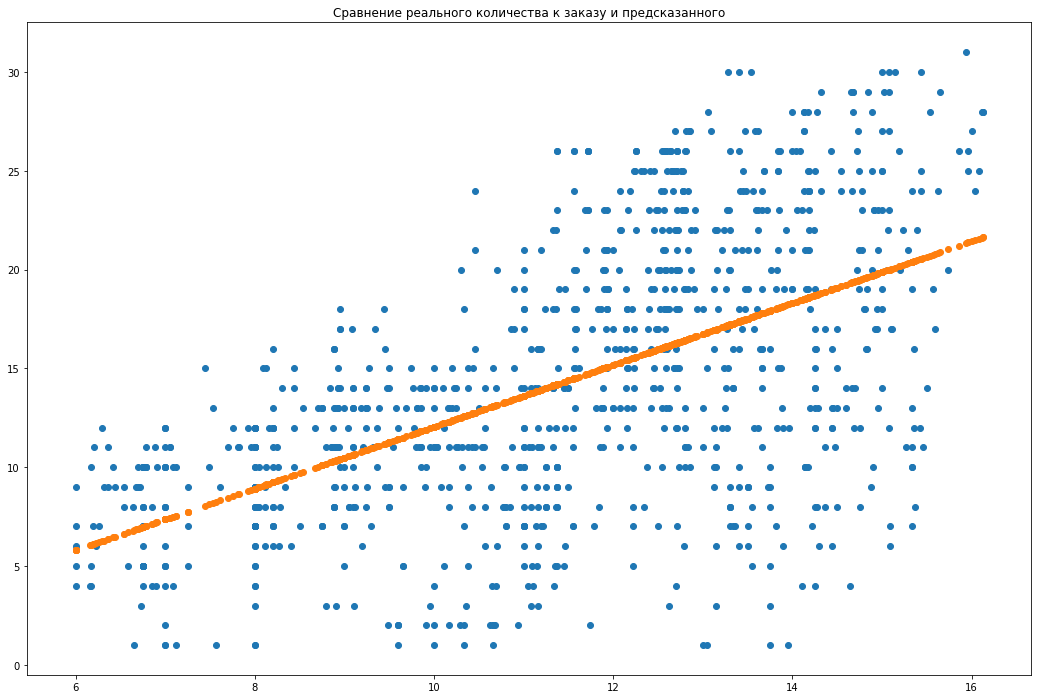

In [136]:
rcParams["figure.figsize"] = 18, 12

plt.scatter(df['ПРДЖ_СР_ШТ_ДО'],y)
plt.scatter(df['ПРДЖ_СР_ШТ_ДО'], np.dot(X, B))
plt.title("Сравнение реального количества к заказу и предсказанного")
plt.show()

In [43]:
mse = ((y-np.dot(X, B))**2).sum()/659803
mse

218.73010407551692

In [44]:
A_mean = 100 * np.mean(np.abs((y - np.dot(X, B)) / y))
A_mean

58.16637593750193

Проверим, является ли полученная модель статистически значимой с помощью критерия Фишера. Установим уровень значимости альфа = 0,05. 
* 1) H0: модель не является статистически значимой
* 2) H1: модель является статистически значимой

In [21]:
n = 659803
p = 17
alpha = 0.05

In [22]:
df1 = p - 1
df1

16

In [23]:
df2 = n - p
df2

659786

In [25]:
SSf = ((np.dot(X, B) - y.mean())**2).sum()
SSf

880105113.1265177

In [26]:
SSo = ((y-np.dot(X, B))**2).sum()
SSo

138238565.96820495

In [27]:
MSf = SSf / df1
MSf

55006569.57040735

In [28]:
MSo = SSo / df2
MSo

209.5203080517091

In [29]:
Fp = MSf / MSo
Fp

262535.74215265026

In [ ]:
Ft = 1.75

Fp > Ft модель является статистически значимой на уровне значимости альфа = 0,05

In [31]:
!pip install -U -q ipywidgets
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


In [30]:
import pylab
import matplotlib.dates
from pylab import rcParams


import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from IPython.display import Image, display, HTML

In [32]:
df = pd.read_csv('Order1c_pred.csv')

In [46]:
def plot_up_to(year, goods):   
    result = df.query(f'(КодТовара == "{goods}") & (ГодЗаказа == "{year}")')
    xdata = result['НеделяЗаказа']
    ydata = result['ЗКЗ_ИТГ_ШТ']
    rcParams["figure.figsize"] = 10, 8

    plt.scatter(xdata,ydata)
    plt.title('Количество к заказу товара по неделям')
    plt.show()

_ = interact(plot_up_to, year=widgets.Dropdown(options=list(df["ГодЗаказа"].unique()), value=2018, description='Год заказа:'), 
             goods=widgets.Dropdown(options=list(df["КодТовара"].unique()), description='Код товара:'))

interactive(children=(Dropdown(description='Год заказа:', options=(2018, 2016, 2017, 2015), value=2018), Dropd…